In [43]:
from os import walk
import pandas as pd
DATAPATH = 'trams'
COLNAMES = ['versionID','line','brigade','time','lon','lat','rawLow','rawLat','status','delay','delayAtStop','plannedLeaveTime','nearestStop',
'nearestStopDistance','nearestStopLon','nearestStopLat','previousStop','previousStopLon','previousStopLat','previousStopDistance','previousStopArrivalTime',
'previousStopLeaveTime','nextStop','nextStopLon','nextStopLat','nextStopDistance','nextStopTimetableVisitTime','courseIdentifier',
'courseDirection','timetableIdentifier','timetableStatus','receivedTime','processingFinishedTime','onWayToDepot','overlapsWithNextBrigade','overlapsWithNextBrigadeStopLineBrigade',
'atStop','speed','oldDelay','serverId','delayAtStopStopSequence','previousStopStopSequence','nextStopStopSequence','delayAtStopStopId','previousStopStopId','nextStopStopId',
'courseDirectionStopStopId']
COLS_FOR_ARFF = ['line','brigade','time','lon','lat','status','nearestStopLon','nearestStopLat','nextStopDistance','nextStopTimetableVisitTime','speed','label']
# print([(i+1,j) for i,j in enumerate(COLNAMES)])
dirs = []
for (dirpath, dirnames, filenames) in walk(DATAPATH):
    dirs.extend(dirnames)

# days = {}

# for dir in dirs:
#     data = []
#     print(dir)
#     for (dirpath, dirnames, filenames) in walk('/'.join([DATAPATH, dir])):
#         data.extend([f for f in filenames if f.startswith('part')])
#     # days[dir] = pd.read_csv('/'.join([DATAPATH, dir,data[0]]), sep=';', header=None, names=COLNAMES)
#     days[dir] = pd.concat([pd.read_csv('/'.join([DATAPATH, dir,file]), sep=';', header=None, names=COLNAMES) for file in data])
#     break

files = []
dir = '2018-09-03'
for (dirpath, dirnames, filenames) in walk('/'.join([DATAPATH, dir])):
    files.extend([f for f in filenames if f.startswith('part')])
# days[dir] = pd.read_csv('/'.join([DATAPATH, dir,data[0]]), sep=';', header=None, names=COLNAMES)
day = pd.concat([pd.read_csv('/'.join([DATAPATH, dir,file]), sep=';', header=None, names=COLNAMES) for file in files])
day['time'] = pd.to_datetime(day['time'], format='%Y-%m-%d %H:%M:%S')
day = day[day['time'].dt.strftime('%Y-%m-%d') == dir]
# day = day.sort_values('time')


In [64]:
day['class'] = None
future = td(minutes=5)
max_reads = 30
for i in range(len(day)-max_reads):
    if i % 10000 == 0:
        print(i)
    record = day.iloc[i]
    for j in range(25, 30):
        current = day.iloc[i+j]
        if(current['time']-record['time'] > future):
            if((current['line'] == record['line']) and (current['brigade'] == record['brigade'])):
                day.at[i, 'class'] = current['time']
            break

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000


In [59]:
day.iloc[0]['class']

0.0

In [47]:
from datetime import timedelta as td

(day['time'][30] - day['time'][0] > td(minutes=5))

True

In [15]:
day['nearestStopDistance'][(day['nearestStopDistance']<30) & (day['nearestStopDistance']!=0)]

4519602     2.354389
6442337    12.287815
1608543     2.026847
5938136    23.369935
1828348    25.926426
             ...    
5748336    10.806318
1132944    24.842321
2986513    10.464359
2006606    23.502395
5980062     4.234232
Name: nearestStopDistance, Length: 2371507, dtype: float64

In [2]:
2801577
2371507
6596777
# close = day[(day['nearestStopDistance']>30) & (day['nearestStopDistance']!=0)]
# day[day['delay'] != day['oldDelay']]['nearestStopDistance']
day['label'] = 0
delay_dic = {}
for i in range(len(day)-1,-1,-1):
    if i % 10000 == 0:
        print(i)
        print(len(delay_dic))
    read = day.iloc[i]
    key = str(read['line'])+'_'+str(read['brigade'])
    if read['nearestStopDistance'] < 30:
        day.at[i, 'label'] = read['delay']
        delay_dic[key] = read['delay']
    elif key in delay_dic:
        day.at[i, 'label'] = delay_dic[key]
    else:
        day.at[i, 'label'] = 0
    


day['label']
# len(day['nearestStopDistance'])

1770000
53
1760000
160
1750000
186
1740000
203
1730000
216
1720000
226
1710000
231
1700000
241
1690000
247
1680000
251
1670000
255
1660000
264
1650000
273
1640000
289
1630000
300
1620000
309
1610000
321
1600000
329
1590000
340
1580000
344
1570000
347
1560000
348
1550000
353
1540000
359
1530000
361
1520000
363
1510000
366
1500000
371
1490000
374
1480000
379
1470000
385
1460000
396
1450000
402
1440000
411
1430000
421
1420000
427
1410000
434
1400000
441
1390000
443
1380000
448
1370000
453
1360000
456
1350000
459
1340000
459
1330000
459
1320000
459
1310000
459
1300000
460
1290000
460
1280000
460
1270000
460
1260000
460
1250000
460
1240000
460
1230000
460
1220000
460
1210000
460
1200000
460
1190000
460
1180000
461
1170000
461
1160000
461
1150000
462
1140000
462
1130000
462
1120000
462
1110000
463
1100000
463
1090000
463
1080000
463
1070000
463
1060000
463
1050000
463
1040000
463
1030000
463
1020000
463
1010000
463
1000000
463
990000
463
980000
463
970000
463
960000
463
950000
463
940000
463

1683544    102.0
1581052      0.0
1559272     19.0
1671396     -3.0
255692       0.0
           ...  
264171      -9.0
264170      14.0
255691     -38.0
227055    -106.0
82911      347.0
Name: label, Length: 1771560, dtype: float64

In [3]:
day.to_csv('trams-'+dir)

In [3]:
import pandas as pd

buses = pd.read_csv('labels/buses-2018-09-03')
trams = pd.read_csv('labels/trams-2018-09-03')

/var/folders/mh/frpd8rxd1lg32713n8kbj7p00000gn/T/ipykernel_6686/1631155439.py:3: DtypeWarning: Columns (3,34,35,37) have mixed types. Specify dtype option on import or set low_memory=False.
  buses = pd.read_csv('labels/buses-2018-09-03')
/var/folders/mh/frpd8rxd1lg32713n8kbj7p00000gn/T/ipykernel_6686/1631155439.py:4: DtypeWarning: Columns (34,35,37) have mixed types. Specify dtype option on import or set low_memory=False.
  trams = pd.read_csv('labels/trams-2018-09-03')


In [12]:
buses['domain'] = 1
trams['domain'] = 0
together = pd.concat([buses, trams])

In [8]:
COLS_FOR_ARFF = ['domain','line','brigade','time','lon','lat','status','nearestStopLon','nearestStopLat','nextStopDistance','nextStopTimetableVisitTime','speed','label']

together.iloc[0][COLS_FOR_ARFF]

domain                                          1
line                                          167
brigade                                         5
time                          2018-09-03 00:00:00
lon                                     21.082527
lat                                     52.208218
status                                    STOPPED
nearestStopLon                           21.08307
nearestStopLat                           52.20835
nextStopDistance                       356.643163
nextStopTimetableVisitTime    2018-09-03 00:06:00
speed                                         0.0
label                                       157.0
Name: 0, dtype: object

In [13]:
together.index = pd.to_datetime(together['time'])

In [14]:
together = together.between_time('00:08:00', '00:09:00')

In [16]:
together['label'] = (together['label']+30)//60
together['label'] = together['label'].astype(int)

In [31]:
(pd.to_datetime(together['time'], format='%Y-%m-%d %H:%M:%S')-min(pd.to_datetime(together['time'], format='%Y-%m-%d %H:%M:%S'))).dt.total_seconds().astype(int)

time
2018-09-03 00:08:00     0
2018-09-03 00:08:00     0
2018-09-03 00:08:00     0
2018-09-03 00:08:00     0
2018-09-03 00:08:00     0
                       ..
2018-09-03 00:08:51    51
2018-09-03 00:08:51    51
2018-09-03 00:08:51    51
2018-09-03 00:08:51    51
2018-09-03 00:08:52    52
Name: time, Length: 1431, dtype: int64

In [35]:

together[COLS_FOR_ARFF].dtypes

domain                          int64
line                           object
brigade                        object
time                           object
lon                           float64
lat                           float64
status                         object
nearestStopLon                float64
nearestStopLat                float64
nextStopDistance              float64
nextStopTimetableVisitTime     object
speed                         float64
label                           int64
dtype: object

In [9]:
len(buses[buses['delay'] != buses['label']]['nearestStopDistance'])

5909233

In [4]:
day[day['delay']==20]

,versionID,line,brigade,time,lon,lat,rawLow,rawLat,status,delay,...,speed,oldDelay,serverId,delayAtStopStopSequence,previousStopStopSequence,nextStopStopSequence,delayAtStopStopId,previousStopStopId,nextStopStopId,courseDirectionStopStopId
1443,20180330,102,1,2018-09-03 06:35:20,21.075514,52.244970,21.075514,52.244970,MOVING,20.0,...,6.62,20.0,OPL,28.0,27.0,29.0,2006_07,2133_02,2006_06,2108_04
1444,20180330,102,1,2018-09-03 06:35:35,21.075440,52.245017,21.075440,52.245017,MOVING_SLOWLY,20.0,...,0.49,20.0,CoW,28.0,27.0,29.0,2006_07,2133_02,2006_06,2108_04
1445,20180330,102,1,2018-09-03 06:35:45,21.074957,52.245350,21.074957,52.245350,MOVING,20.0,...,4.95,20.0,OPL,29.0,28.0,29.0,2006_06,2006_07,2006_06,2108_04
1446,20180330,102,1,2018-09-03 06:36:00,21.074772,52.246243,21.074772,52.246243,MOVING,20.0,...,5.75,20.0,CoW,29.0,28.0,29.0,2006_06,2006_07,2006_06,2108_04
1447,20180330,102,1,2018-09-03 06:36:05,21.074723,52.246614,21.074723,52.246614,MOVING,20.0,...,7.07,20.0,OPL,29.0,28.0,29.0,2006_06,2006_07,2006_06,2108_04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6583130,20180330,ZP,5,2018-09-03 21:53:29,20.943958,52.206638,20.943958,52.206638,MOVING,20.0,...,15.06,0.0,CoW,5.0,4.0,5.0,4047_02,4044_02,4047_02,4195_01
6583899,20180330,ZP,6,2018-09-03 12:49:34,20.806587,52.167725,20.806587,52.167725,MOVING,20.0,...,8.10,-14.0,OPL,15.0,14.0,15.0,4193_04,4877_02,4193_04,4195_01
6585449,20180330,ZP,6,2018-09-03 17:27:51,20.806557,52.167225,20.806557,52.167225,MOVING,20.0,...,6.33,14.0,OPL,15.0,14.0,15.0,4193_04,4877_02,4193_04,4195_01
6593723,20180330,ZW,4,2018-09-03 11:52:20,20.868889,52.192165,20.868889,52.192165,MOVING,20.0,...,5.49,20.0,CoW,19.0,18.0,20.0,4342_04,4207_01,4343_02,4044_01


In [3]:
# day.groupby(['point',day.time.dt.floor('15Min')]).size()
import statistics as stats
std_lat = stats.stdev(day['lat'])
mean_lat = stats.mean(day['lat'])
std_lon = stats.stdev(day['lon'])
mean_lon = stats.mean(day['lon'])
windows = 100
tol = 1
lat_base = tol*2*std_lat/windows
lon_base = tol*2*std_lon/windows

# lat = (52.12, 52.33)
# lon = (20.9, 21.15)


In [7]:
# day[].groupby(['point',day.time.dt.floor('15Min')]).size()
df = day[(day.lat > mean_lat - tol*std_lat) & (day.lat < mean_lat + tol*std_lat) & (day.lon > mean_lon - tol*std_lon) & (day.lon < mean_lon + tol*std_lon)]

In [8]:
res = df.groupby([df.time.dt.floor('15Min'), (df.lat//lat_base)*lat_base, (df.lon//lon_base)*lon_base]).agg(count=('versionID', 'count'), avg_speed=('speed', 'mean'), avg_delay=('delay', 'mean'))


for timestamp in set([timestamp for timestamp, _, _ in res.index]):
    res.loc[timestamp].to_csv(f'res/{timestamp.strftime("%Y-%m-%d-%H-%M")}')

In [5]:
import json

with open('config.json', 'w') as fp:
    json.dump({'lat_base': lat_base, 'lon_base':lon_base, 'lat_0':mean_lat - tol*std_lat, 'lon_0':mean_lon - tol*std_lon}, fp)

<AxesSubplot:>

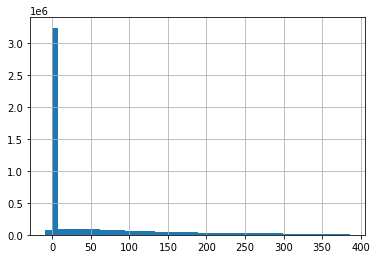

In [12]:
days['2021-10-19']['delay'].sort_values()[int(len(days['2021-10-19'])*0.1):int(len(days['2021-10-19'])*0.9)].hist(bins=50)

In [14]:
days['2021-10-19']['delay'].sort_values()

111327     -8419.0
114384     -8419.0
113092     -8419.0
20152      -8363.0
15253      -8363.0
            ...   
74462     164508.0
74829     164518.0
75308     164529.0
75670     164540.0
744       172644.0
Name: delay, Length: 6731604, dtype: float64

In [1]:
from aggregate import Aggregator

ag = Aggregator('2018-09-01', 100, '15Min', 'config.json')
ag.run()

buses/2018-09-01


/Users/karol/Desktop/studia/Workshop/aggregate.py:85: DtypeWarning: Columns (1,2,35) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv(


In [28]:
from os import walk
import pandas as pd
import statistics as stats

COLNAMES = ['versionID','line','brigade','time','lon','lat','rawLow','rawLat','status','delay','delayAtStop','plannedLeaveTime','nearestStop',
'nearestStopDistance','nearestStopLon','nearestStopLat','previousStop','previousStopLon','previousStopLat','previousStopDistance','previousStopArrivalTime',
'previousStopLeaveTime','nextStop','nextStopLon','nextStopLat','nextStopDistance','nextStopTimetableVisitTime','courseIdentifier',
'courseDirection','timetableIdentifier','timetableStatus','receivedTime','processingFinishedTime','onWayToDepot','overlapsWithNextBrigade','overlapsWithNextBrigadeStopLineBrigade',
'atStop','speed','oldDelay','serverId','delayAtStopStopSequence','previousStopStopSequence','nextStopStopSequence','delayAtStopStopId','previousStopStopId','nextStopStopId',
'courseDirectionStopStopId']
# COLS_FOR_ARFF = ['domain','line','brigade','time','lon','lat','status','nearestStopLon','nearestStopLat','nextStopDistance','speed','delay']
# COLS_FOR_ARFF = ['domain','time','lon','lat','nearestStopLon','nearestStopLat','nextStopDistance','speed','delay']
COLS_FOR_ARFF = ['domain','line','time','delay','lon','lat','nearestStopLon','nearestStopLat','nextStopDistance','speed','class']
# buses = pd.read_csv('buses/2018-09-03/part-r-00000', sep=';', header=None, names=COLNAMES)
# trams = pd.read_csv('trams/2018-09-03/part-r-00000', sep=';', header=None, names=COLNAMES)
buses = pd.read_csv('buses-09-04.csv')
trams = pd.read_csv('trams-09-04.csv')
buses['domain'] = 1
trams['domain'] = 0
# together = buses[COLS_FOR_ARFF]
together = pd.concat([buses, trams])[COLS_FOR_ARFF]
together = together.dropna()
together.index = pd.to_datetime(together['time'])
#clipping
# together = together.between_time('08:00:00', '09:00:00')
# together['lon'] = together['lon']-min(together['lon'])
# together['lat'] = together['lat']-min(together['lat'])
together['time'] = (pd.to_datetime(together['time'], format='%Y-%m-%d %H:%M:%S')-min(pd.to_datetime(together['time'], format='%Y-%m-%d %H:%M:%S'))).dt.total_seconds().astype(int)
# together = together[~together['class'].isnull()]
# together = together[~together['delay'].isnull()]
together['class'] = (together['class']+30)//60
together = together[(together['delay']<=1000)&(together['delay']>=-1000)]
# together = together[(together['class']<=3)&(together['class']>=-2)]
together.reset_index(drop = True, inplace = True)
# together = together.sort_values(['domain','time'], ascending=[False, True])

together = together.sort_values('time')
# together['class'] = together['delay']
# together.drop(columns=['delay'], inplace=True)
# filter square
std_lat = stats.stdev(together[together['domain']<0.5]['lat'])
mean_lat = stats.mean(together[together['domain']<0.5]['lat'])
std_lon = stats.stdev(together[together['domain']<0.5]['lon'])
mean_lon = stats.mean(together[together['domain']<0.5]['lon'])
tol = 0.2
together = together[
            (together.lat > mean_lat - tol * std_lat)
            & (together.lat < mean_lat + tol * std_lat)
            & (together.lon > mean_lon - tol * std_lon)
            & (together.lon < mean_lon + tol * std_lon)]

/var/folders/mh/frpd8rxd1lg32713n8kbj7p00000gn/T/ipykernel_13475/359952130.py:16: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  buses = pd.read_csv('buses-09-04.csv')


In [40]:
mean_lat
# mean_lon

52.241131879291316

In [38]:
maj_c = together[together.domain==0].mode()['class'][0]
maj_percent = sum((together.domain==0) & (together['class']==maj_c))/sum(together.domain==0)

 0.0       78986
 1.0       47040
 2.0       33845
-1.0       31920
 3.0       21254
           ...  
 1318.0        1
 45.0          1
 59.0          1
 47.0          1
 44.0          1
Name: class, Length: 129, dtype: int64

In [26]:
COLS_FOR_ARFF = ['domain','line','time','delay','lon','lat','nearestStopLon','nearestStopLat','nextStopDistance','speed','class']
FINAL_COLS = ['domain','time','delay','lon','lat','nearestStopLon','nearestStopLat','nextStopDistance','speed','class']
# buses = pd.read_csv('buses/2018-09-03/part-r-00000', sep=';', header=None, names=COLNAMES)
# trams = pd.read_csv('trams/2018-09-03/part-r-00000', sep=';', header=None, names=COLNAMES)
# src = pd.read_csv('buses-09-03.csv')
# src = src[src['line']!=157]
# src['domain'] = 1
tar = pd.read_csv('buses-09-04.csv')
tar = tar[tar['line']==157]
tar['domain'] = 0
together = tar[COLS_FOR_ARFF]
# together = pd.concat([src, tar])[COLS_FOR_ARFF]
together = together.dropna()
together.index = pd.to_datetime(together['time'])
#clipping
# together = together.between_time('08:00:00', '09:00:00')
# together['lon'] = together['lon']-min(together['lon'])
# together['lat'] = together['lat']-min(together['lat'])
together['time'] = (pd.to_datetime(together['time'], format='%Y-%m-%d %H:%M:%S')-min(pd.to_datetime(together['time'], format='%Y-%m-%d %H:%M:%S'))).dt.total_seconds().astype(int)
# together = together[~together['class'].isnull()]
# together = together[~together['delay'].isnull()]
together['class'] = (together['class']>60)*1-(together['class']<-30)*1
together = together[(together['delay']<=1000)&(together['delay']>=-1000)]
together = together[(together['class']<=5)&(together['class']>=-2)]
together.reset_index(drop = True, inplace = True)
# together = together.sort_values(['domain','time'], ascending=[False, True])
print(len(together))
together = together.sort_values('time')

/var/folders/mh/frpd8rxd1lg32713n8kbj7p00000gn/T/ipykernel_13475/782103177.py:8: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  tar = pd.read_csv('buses-09-04.csv')
/var/folders/mh/frpd8rxd1lg32713n8kbj7p00000gn/T/ipykernel_13475/782103177.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tar['domain'] = 0


39037


In [27]:
std_lat = 0.009043717
mean_lat = 49.279011857905495
std_lon = 0.01466772684
mean_lon = 20.979407737242212
tol = 10
together[
            (together.lat > mean_lat - tol * std_lat)
            & (together.lat < mean_lat + tol * std_lat)
            & (together.lon > mean_lon - tol * std_lon)
            & (together.lon < mean_lon + tol * std_lon)]

,domain,line,time,delay,lon,lat,nearestStopLon,nearestStopLat,nextStopDistance,speed,class


In [35]:
together[(together.domain==1)&(together['class']<=5)&(together['class']>=-2)]

,domain,time,delay,lon,lat,nearestStopLon,nearestStopLat,nextStopDistance,speed,class
3681870,1,18,-97.0,20.978751,49.284352,20.991360,52.244120,325.394132,2.67,-1.0
1301278,1,18,-131.0,20.975132,49.264725,20.988053,52.224440,643.310636,0.00,-1.0
3687921,1,21,228.0,21.008234,49.277054,21.016890,52.236970,287.055907,8.80,4.0
3679581,1,21,0.0,20.992138,49.269639,21.003755,52.229288,83.339445,3.65,0.0
3678718,1,22,0.0,20.990098,49.269707,21.002953,52.229321,433.206644,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...
3677742,1,86097,109.0,21.001451,49.284882,21.014080,52.244690,30.064592,8.90,1.0
3691576,1,86098,123.0,20.991405,49.285580,21.002075,52.243612,762.376440,6.34,3.0
1666945,1,86098,138.0,20.979301,49.272154,20.993580,52.231940,101.427619,1.09,4.0
3653578,1,86099,20.0,21.009459,49.272687,21.022351,52.232275,306.775660,0.00,1.0


array([[<AxesSubplot:title={'center':'class'}>]], dtype=object)

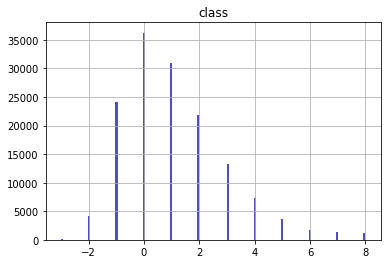

In [33]:
together[(together.domain==0)&(together['class']<=8)&(together['class']>=-3)].hist('class', bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=10)

array([[<AxesSubplot:title={'center':'class'}>]], dtype=object)

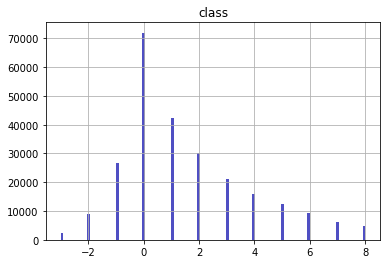

In [34]:
together[(together.domain==1)&(together['class']<=8)&(together['class']>=-3)].hist('class', bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=10)